<a href="https://colab.research.google.com/github/kamala2dt/kamala2dt/blob/main/Covid19_by_Status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#from google.colab import drive
#drive.mount('/content/gdrive)

In [26]:
from google.colab import files
uploaded = files.upload()

Saving Covid19_demographic_all_20220422.csv to Covid19_demographic_all_20220422 (2).csv


In [27]:
df = pd.read_csv('Covid19_demographic_all_20220422.csv', dtype=str)
df.head()

,ResourceID,Geo,Period,Label1,Label2,Value,Unit,Measure,Multiplier
0,CPCOV5,NaN,2022-04-22,Active,Female,31022,Number,Total number of COVID-19 cases,0
1,CPCOV5,NaN,2022-04-22,Active,Male,26405,Number,Total number of COVID-19 cases,0
2,CPCOV5,NaN,2022-04-22,Active,Unknown,64,Number,Total number of COVID-19 cases,0
3,CPCOV5,NaN,2022-04-22,Deceased,Female,269,Number,Total number of COVID-19 cases,0
4,CPCOV5,NaN,2022-04-22,Deceased,Male,341,Number,Total number of COVID-19 cases,0


In [28]:
df['Period'] = pd.to_datetime(df['Period'], format = '%Y-%m-%d')

In [29]:
df = df.drop('ResourceID', 1)
df = df.drop('Geo', 1)
df = df.drop('Unit', 1)
df = df.drop('Measure', 1)
df = df.drop('Multiplier', 1)
df.head()

,Period,Label1,Label2,Value
0,2022-04-22,Active,Female,31022
1,2022-04-22,Active,Male,26405
2,2022-04-22,Active,Unknown,64
3,2022-04-22,Deceased,Female,269
4,2022-04-22,Deceased,Male,341


In [30]:
df = df[df['Label2'] !='Unknown']

In [31]:
df['Label2'].unique().tolist()

['Female',
 'Male',
 'Asian',
 'European/other',
 'Middle Eastern, Latin American and African (MELAA)',
 'Maori',
 'Pacific peoples',
 '0 to 9',
 '10 to 19',
 '20 to 29',
 '30 to 39',
 '40 to 49',
 '50 to 59',
 '60 to 69',
 '70 to 79',
 '80 to 89',
 '90+']

In [32]:
list_gender = ['Female', 'Male']
list_ethnicity = ['Asian','European/other','Middle Eastern, Latin American and African (MELAA)','Maori','Pacific peoples']
list_age_group = ['0 to 9','10 to 19', '20 to 29', '30 to 39', '40 to 49', '50 to 59', '60 to 69','70 to 79','80 to 89','90+']

In [34]:
df_gender = df[df['Label2'].isin(list_gender)]
df_gender

,Period,Label1,Label2,Value
0,2022-04-22,Active,Female,31022
1,2022-04-22,Active,Male,26405
3,2022-04-22,Deceased,Female,269
4,2022-04-22,Deceased,Male,341
6,2022-04-22,Recovered,Female,428351
7,2022-04-22,Recovered,Male,383279


In [35]:
df_ethnicity = df[df['Label2'].isin(list_ethnicity)]
df_ethnicity

,Period,Label1,Label2,Value
9,2022-04-22,Active,Asian,7391
10,2022-04-22,Active,European/other,37476
11,2022-04-22,Active,"Middle Eastern, Latin American and African (ME...",953
12,2022-04-22,Active,Maori,8475
13,2022-04-22,Active,Pacific peoples,2761
15,2022-04-22,Deceased,Asian,30
16,2022-04-22,Deceased,European/other,385
17,2022-04-22,Deceased,"Middle Eastern, Latin American and African (ME...",7
18,2022-04-22,Deceased,Maori,104
19,2022-04-22,Deceased,Pacific peoples,83


In [36]:
df_age_group = df[df['Label2'].isin(list_age_group)]
df_age_group

,Period,Label1,Label2,Value
27,2022-04-22,Active,0 to 9,6535
28,2022-04-22,Active,10 to 19,8009
29,2022-04-22,Active,20 to 29,10033
30,2022-04-22,Active,30 to 39,10526
31,2022-04-22,Active,40 to 49,8642
32,2022-04-22,Active,50 to 59,6379
33,2022-04-22,Active,60 to 69,4235
34,2022-04-22,Active,70 to 79,2052
35,2022-04-22,Active,80 to 89,802
36,2022-04-22,Active,90+,278


By Age Group

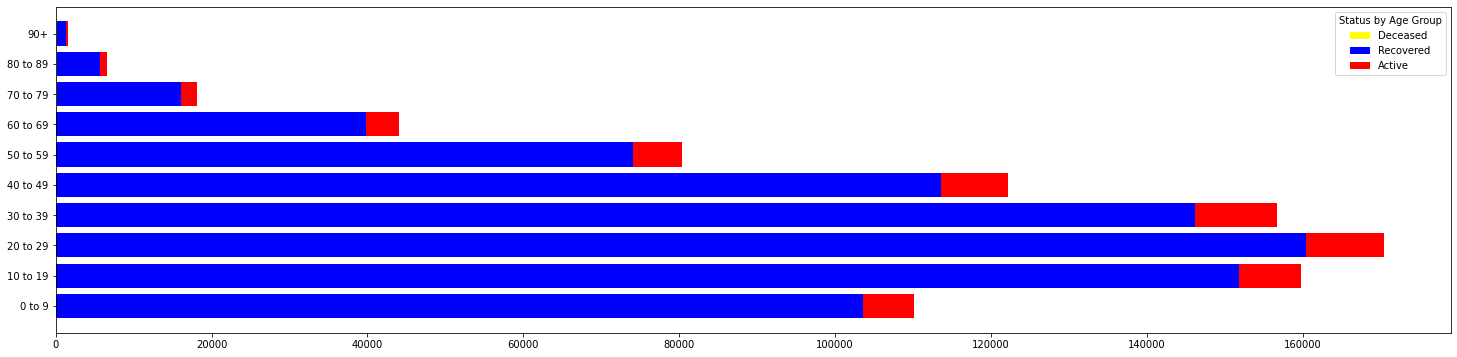

In [37]:
fig, ax = plt.subplots(figsize=(25,6))

y_axis = list_age_group
active = np.array(df_age_group[df_age_group['Label1']=='Active']['Value'])
deceased = np.array(df_age_group[df_age_group['Label1']=='Deceased']['Value'])
recovered = np.array(df_age_group[df_age_group['Label1']=='Recovered']['Value'])

vector = np.vectorize(np.int)
active = vector(active)
deceased = vector(deceased)
recovered = vector(recovered)

plot_deceased = plt.barh(y_axis, deceased, color="yellow")
plot_recovered = plt.barh(y_axis, recovered, left=deceased, color="blue")
plot_active = plt.barh(y_axis, active, left=recovered, color="red")

plt.legend([plot_deceased, plot_recovered, plot_active], ["Deceased", "Recovered", "Active"], title="Status by Age Group", loc="upper right")
plt.show()

By Ethnicity

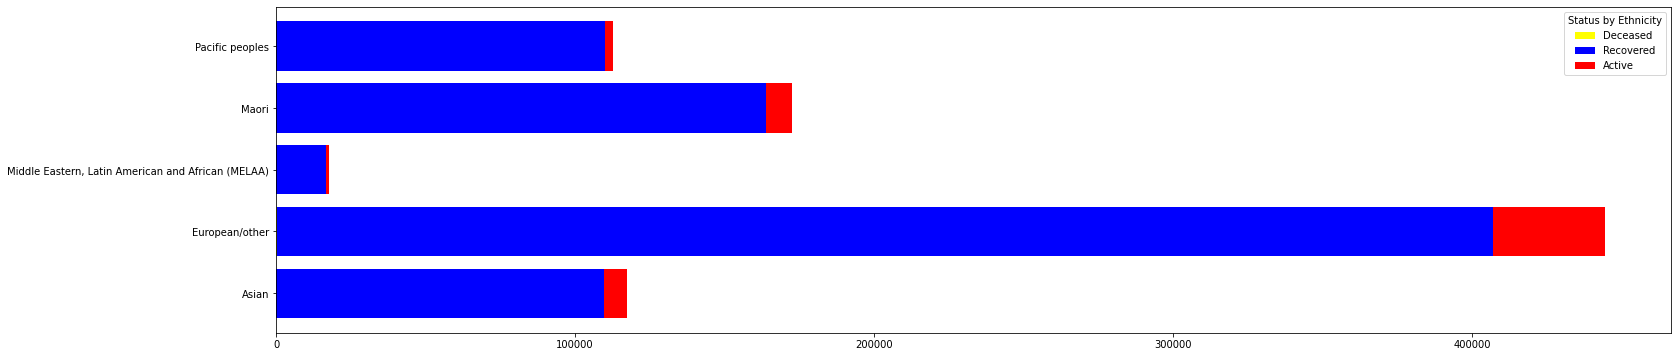

In [38]:
fig, ax = plt.subplots(figsize=(25,6))

y_axis = list_ethnicity
active = np.array(df_ethnicity[df_ethnicity['Label1']=='Active']['Value'])
deceased = np.array(df_ethnicity[df_ethnicity['Label1']=='Deceased']['Value'])
recovered = np.array(df_ethnicity[df_ethnicity['Label1']=='Recovered']['Value'])

vector = np.vectorize(np.int)
active = vector(active)
deceased = vector(deceased)
recovered = vector(recovered)

plot_deceased = plt.barh(y_axis, deceased, color="yellow")
plot_recovered = plt.barh(y_axis, recovered, left=deceased, color="blue")
plot_active = plt.barh(y_axis, active, left=recovered, color="red")

plt.legend([plot_deceased, plot_recovered, plot_active], ["Deceased", "Recovered", "Active"], title="Status by Ethnicity", loc="upper right")
plt.show()

By Gender

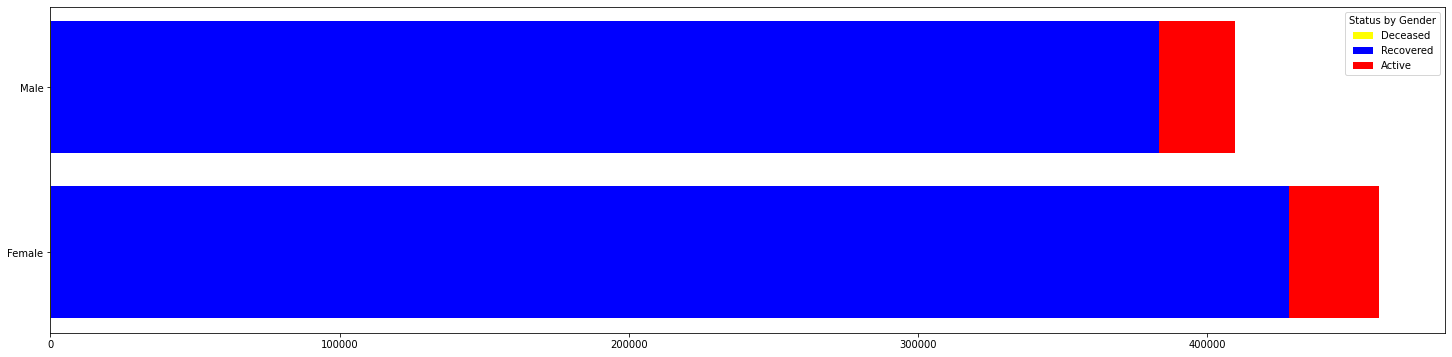

In [39]:
fig, ax = plt.subplots(figsize=(25,6))

y_axis = list_gender
active = np.array(df_gender[df_gender['Label1']=='Active']['Value'])
deceased = np.array(df_gender[df_gender['Label1']=='Deceased']['Value'])
recovered = np.array(df_gender[df_gender['Label1']=='Recovered']['Value'])

vector = np.vectorize(np.int)
active = vector(active)
deceased = vector(deceased)
recovered = vector(recovered)

plot_deceased = plt.barh(y_axis, deceased, color="yellow")
plot_recovered = plt.barh(y_axis, recovered, left=deceased, color="blue")
plot_active = plt.barh(y_axis, active, left=recovered, color="red")

plt.legend([plot_deceased, plot_recovered, plot_active], ["Deceased", "Recovered", "Active"], title="Status by Gender", loc="upper right")
plt.show()

Import to csv

In [41]:
df_ethnicity.to_csv('df_ethnicity.csv', index=False)